<a href="https://colab.research.google.com/github/Piyaphum/Machine-Learning-Exercise/blob/main/NearestNeighbors_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# k-nearest neighbour (k-NN)
เราสามารถสร้าง k-nearest neighbour method ได้ด้วยตัวเอง

1.   นำเข้า sklearn.metrics.pairwise library เพื่อใช้งานฟังก์ชันคำนวณระยะห่างแบบ euclidean distance
          from sklearn.metrics.pairwise import euclidean_distances

2.   คำนวณระยะห่างระหว่างจุดข้อมูลใหม่ new_data กับจุดข้อมูลทั้งหมด X ในชุดข้อมูล
          dists = np.squeeze(euclidean_distances(new_data, X))

3.   เรียงระยะห่างข้อมูลจากน้อยไปมาก และเลือกระยะห่างที่น้อยที่สุด k ค่า
          min_list = np.sort(dists.ravel())[0:k]  

4.   หาค่าตำแหน่งข้อมูล k ค่าที่ได้จากข้อ 3 โดยใช้เงื่อนไขระยะห่างน้อยกว่าระยะห่างที่มากที่สุดในกลุ่ม k ตัว
          minpos = np.squeeze(np.where (dists <= min_list[k-1]))

5.   แสดงค่าผลลัพธ์ที่ได้จากตำแหน่ง k ค่า
          y[minpos]



In [3]:
data_file = "students.csv"
df = pd.read_csv(data_file)
X= df.iloc[:,:-1].values # X is list of feature columns
y = df.iloc[:,-1].values # y is label column
new_data = [[65,165]]
k = 3
dists = np.squeeze(euclidean_distances(new_data, X)) # calculate distance between new_data and each row in dataframe
min_list = np.sort(dists.ravel())[0:k] # list k nearest neighbors
print("list of k nearest neighbors distances :", min_list)
minpos = np.squeeze(np.where (dists <= min_list[k-1])) # list of row numbers which are nearest neighbor of new data
print("list of row number :", minpos)
y[minpos]


list of k nearest neighbors distances : [12.64911064 15.8113883  16.40121947]
list of row number : [2 8 9]


array(['Female', 'Male', 'Male'], dtype=object)

# k-nearest neighbour (k-NN)
เราสามารถใช้งาน k-nearest neighbour method สำเร็จรูปได้จาก sklearn.

1.   นำเข้า sklearn.neighbors library
          from sklearn.neighbors import KNeighborsClassifier

2.   สร้างอัลกอริทึม KNeighborsClassifier
          knn = KNeighborsClassifier(n_neighbors=k)

3.   เรียกใช้งานกับข้อมูล data, gender
          knn.fit(data, gender)

4.   ทำนายข้อมูลกับจุดข้อมูลใหม่ new_data และแสดงผลลัพธ์ในตัวแปร pred_class
          prediction = knn.predict(new_data)
          pred_class = value_dict[prediction[0]]

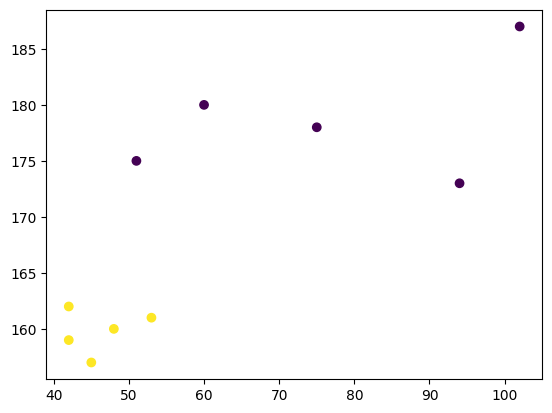

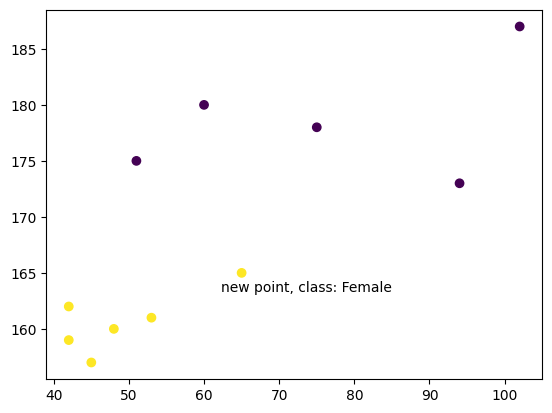

In [4]:
data_file = "students.csv"
df = pd.read_csv(data_file)
X= df.iloc[:,:-1].values # X is list of feature columns
y = df.iloc[:,-1].values # y is label column
value_dict = {'Male':1, 'Female':2}
classes = [value_dict[x] for x in y]
weight = np.squeeze(X[:,0])
height = np.squeeze( X[:,1])
gender = np.squeeze( y)
plt.scatter(weight,height,c = classes)
plt.show()
new_data = [[65,165]]
k = 1
data = list(zip(X[:,0], X[:,1]))
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(data, gender)
prediction = knn.predict(new_data)
pred_class = value_dict[prediction[0]]
new_x = new_data[0][0]
new_y = new_data[0][1]
x = np.append(weight, new_x)
y = np.append(height, new_y)
plt.scatter(x, y, c=classes + [pred_class])
plt.text(x=new_x-2.7, y=new_y-1.7, s=f"new point, class: {prediction[0]}")
plt.show()

# Condensed Nearest Neighbour (CNN)
Undersample based on the condensed nearest neighbour method.

1.   นำเข้า imblearn under_sampling library
          from imblearn.under_sampling import CondensedNearestNeighbour  

2.   สร้างอัลกอริทึม CondensedNearestNeighbour
          cnn = CondensedNearestNeighbour(random_state=42)  
3.   เรียกใช้งานกับข้อมูล X, y
          X_res, y_res = cnn.fit_resample(X, y)  





In [5]:
from collections import Counter
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import scale
from imblearn.under_sampling import CondensedNearestNeighbour
X, y = fetch_openml('diabetes', version=1, return_X_y=True)
X = scale(X)
print('Original dataset shape %s' % Counter(y))
cnn = CondensedNearestNeighbour(random_state=42)
X_res, y_res = cnn.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({'tested_negative': 500, 'tested_positive': 268})
Resampled dataset shape Counter({'tested_positive': 268, 'tested_negative': 181})


# สร้างแผนภาพ scatter plot แสดงตำแหน่งข้อมูล 6 จุด

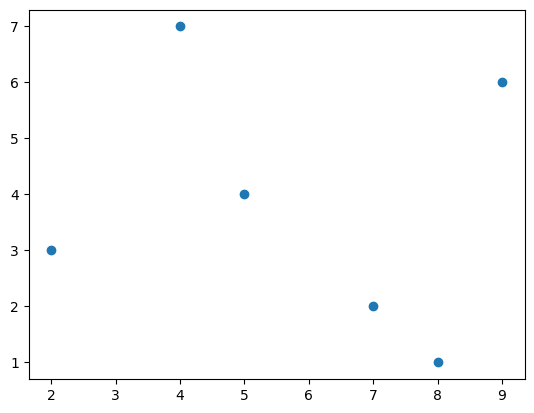

In [6]:
data = np.array([[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]])
X = np.squeeze(data[:,0])
Y = np.squeeze(data[:,1])
plt.scatter(X,Y)
plt.show()

# แสดง KD-Tree
1.   สร้าง class Node สำหรับเก็บข้อมูลค่ามัธยฐานใน location และ node ด้านซ้าย (left) และ node ด้่านขวา (right)
          class Node:
              location = None
              left = None
              right = None

2.   สร้างฟังก์ชัน KdTree และกำหนดค่าเริ่มต้น
          length = pointList.shape[0]    # ค่าจำนวนข้อมูลที่ต้องการแบ่งใน tree
          node = Node()                  # สร้าง node สำหรับเก็บข้อมูล
          ax = depth % 2                 # สลับค่า 0, 1 ในแต่ละรอบ เพื่อแบ่งข้อมูลตามแกน X และ Y
          depth += 1                     # นับจำนวนระดับที่ต้องแบ่งใน tree  

3.   สร้างเงื่อนไขในการแบ่งข้อมูลในแต่ละระดับ
            if length == 0:              # กรณีที่ไม่มีข้อมูลเหลือให้แบ่งแล้ว
              return node               
            elif length == 1:            # กรณีที่ข้อมูลเหลือหนึ่งตัว เป็น Leaf node
              node.location = np.median(pointList,axis=0)[ax]
              print(pointList, "-- |")

4.   เงื่อนไขที่ยังรายการข้อมูลเหลือมากกว่า 1 ตัว ต้องเรียกฟังก์ชัน KdTree ซ้ำ (Recursive Function) ด้วยแบ่งออกเป็นสองส่วน

            elif length > 1:
              node.location = np.median(pointList,axis=0)[ax]   # กำหนดตำแหน่งมัธยฐาน เพื่อแบ่งข้อมูลออกเป็น 2 ส่วน
              select_indices1 = np.where(pointList[:,ax] <= node. location)[0]
              select_indices2 = np.where(pointList[:,ax] > node. location)[0]
              node.left = KdTree(pointList[select_indices1] ,depth)
              print("----------"*length,  np.median(pointList,axis=0))
              node.right = KdTree(pointList[select_indices2] ,depth)

            *   กลุ่มข้อมูลที่มีค่าน้อยกว่าหรือเท่ากับค่ามัธยฐาน
                select_indices1 = np.where(pointList[:,ax] <= node. location)[0]
                node.left = KdTree(pointList[select_indices1] ,depth)

            *   กลุ่มข้อมูลที่มีค่ามากกว่าค่ามัธยฐาน
                select_indices2 = np.where(pointList[:,ax] > node. location)[0]
                node.right = KdTree(pointList[select_indices2] ,depth)




In [11]:
class Node:
  location = None
  left = None
  right = None
def KdTree(pointList, depth = 0):
  length = pointList.shape[0]
  node = Node()
  ax = depth % 2 # Switch axis x, y in each level
  depth += 1 # count level in Tree
  if length == 0:
    return node
  elif length == 1:
    node.location = np.median(pointList,axis=0)[ax]
    print(pointList, "-- |")
  elif length > 1:
    node.location = np.median(pointList,axis=0)[ax]
    select_indices1 = np.where(pointList[:,ax] <= node. location)[0]
    select_indices2 = np.where(pointList[:,ax] > node. location)[0]
    node.left = KdTree(pointList[select_indices1] ,depth)
    print("----------"*length, np.median(pointList,axis=0))
    node.right = KdTree(pointList[select_indices2] ,depth)
  else:
    print("No point list !!!")

  return node
# Sample data
data = np.array([[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]])
tree = KdTree(data, depth = 0)


[[2 3]] -- |
-------------------- [3.5 3.5]
[[5 4]] -- |
------------------------------ [4. 4.]
[[4 7]] -- |
------------------------------------------------------------ [6.  3.5]
[[7 2]] -- |
-------------------- [7.5 1.5]
[[8 1]] -- |
------------------------------ [8. 2.]
[[9 6]] -- |


# เรียกใช้ KDTree สำเร็จรูป
1.   นำเข้า sklearn.neighbors library
          from sklearn.neighbors import KDTree

2.   สร้างอัลกอริทึม KDTree
          data = np.array([[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]])
          length = data.shape[0]

          # Build KD tree
          kdtree = KDTree(data, leaf_size=length)

3.   ค้นหาข้อมูล query_point แล้วแสดงค่าข้อมูลใกล้เคียงที่สุดจำนวน k ค่า
          # Query the KD tree for nearest neighbors
          query_point = np.array([[9, 2]])
          distances, indices = kdtree.query(query_point, k=2)

In [12]:
from sklearn.neighbors import KDTree
import numpy as np
# Sample data
data = np.array([[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]])
length = data.shape[0]
# Build KD tree
kdtree = KDTree(data, leaf_size=length)
# Query the KD tree for nearest neighbors
query_point = np.array([[9, 2]])
distances, indices = kdtree.query(query_point, k=3)
# Print results
print('Query Point:', query_point)
print('Nearest Neighbors:')
for i, idx in enumerate(indices[0]):
  print(f'Neighbor {i + 1}: {data[idx]}, Distance: {distances[0][i]}')


Query Point: [[9 2]]
Nearest Neighbors:
Neighbor 1: [8 1], Distance: 1.4142135623730951
Neighbor 2: [7 2], Distance: 2.0
Neighbor 3: [9 6], Distance: 4.0


# เรียกใช้ BallTree สำเร็จรูป
1.   นำเข้า sklearn.neighbors library
          from sklearn.neighbors import BallTree

2.   สร้างอัลกอริทึม BallTree
          data = np.array([[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]])
          length = data.shape[0]

          # Build Ball tree
          ball_tree = BallTree(data)

3.   ค้นหาข้อมูล query_point แล้วแสดงค่าข้อมูลใกล้เคียงที่สุดจำนวน k ค่า
          
          query_point = np.array([[9, 2]])
          distances, indices = ball_tree.query(query_point, k=2)

In [13]:
from sklearn.neighbors import BallTree
import numpy as np
# Sample 2D dataset
data = np.array([[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]])
# Constructing Ball Tree
ball_tree = BallTree(data)
# Query point
query_point = np.array([[9, 2]])